# Timeserie 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.font_manager import FontProperties


In [2]:
df = pd.read_csv("../data/cleaned/sbarchi-per-giorno.csv")
df["Data"] = pd.to_datetime(df["Data"])
df.head()

,Data,Valore
0,2019-09-01,121.0
1,2019-09-02,315.0
2,2019-09-03,53.0
3,2019-09-04,0.0
4,2019-09-05,0.0


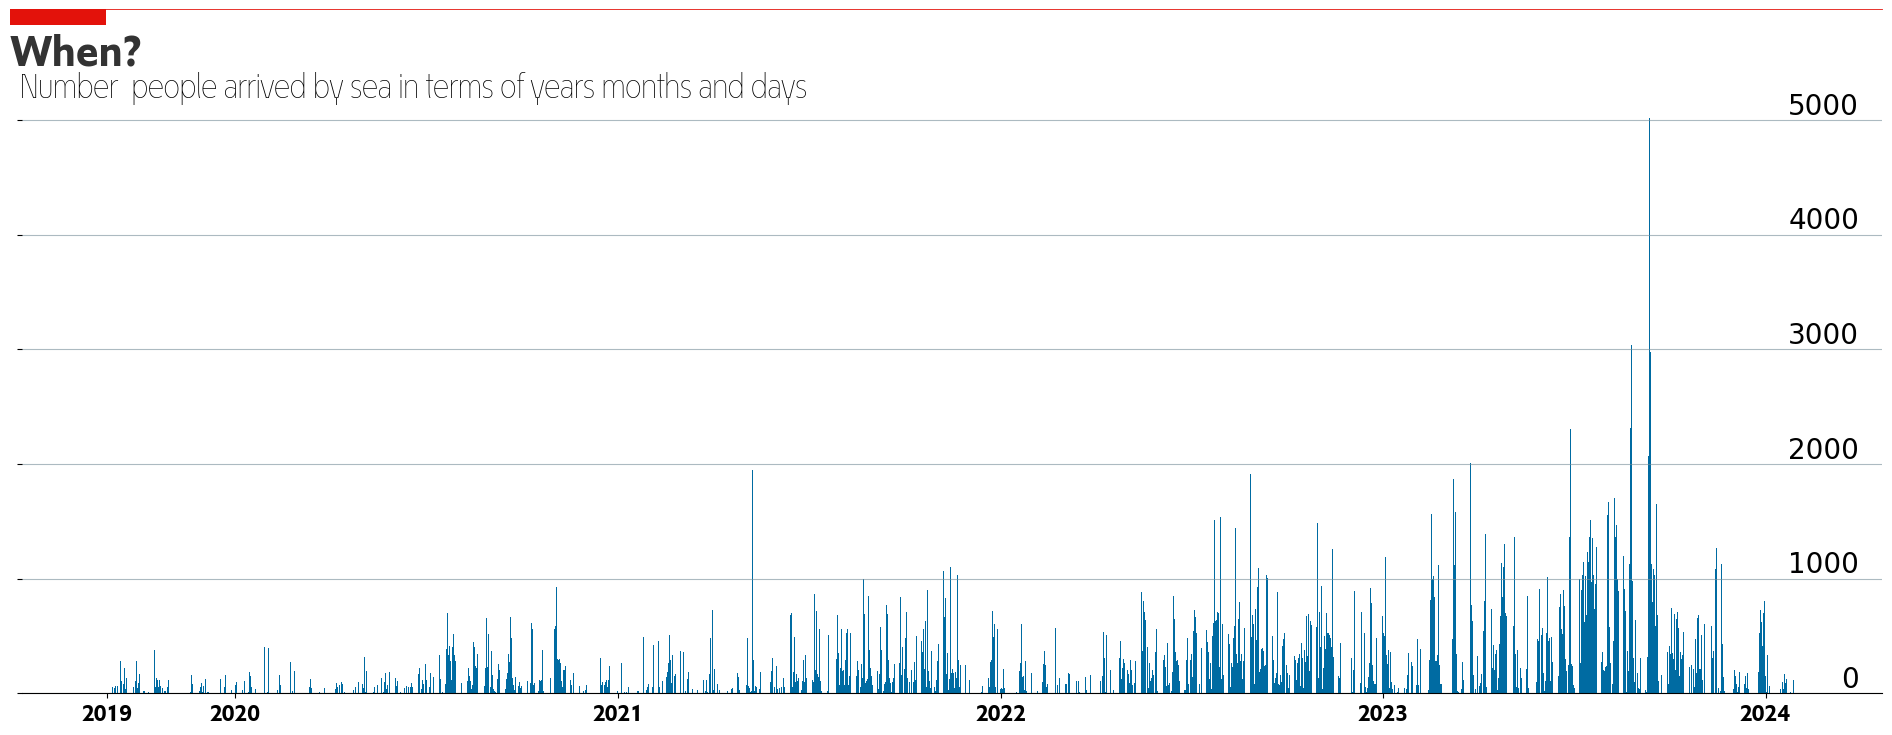

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming df is already defined and 'Data' column is of datetime type
# If not, you might need to convert it:
# df['Data'] = pd.to_datetime(df['Data'])

font_path = '../data/econosans/ecosans-bol.woff2.ttf' 
custom_font = FontProperties(fname=font_path, size=35)
font_path2 = '../data/econosans/EconoSansReduced-35Thin.ttf'
custom_font2 = FontProperties(fname=font_path2, size=100)
fig, ax = plt.subplots(figsize=(24,8), dpi=100)

ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
ax.bar(df['Data'], 
       df['Valore'], 
       color='#006BA2',
       linewidth=3)

ax.spines[['top','right','left']].set_visible(False)

# Set x-axis ticks for years only, assuming 'Data' is a datetime column
years = df['Data'].dt.year.unique()
# Assuming 'Data' spans full years, find positions for yearly ticks
tick_positions = df.groupby(df['Data'].dt.year)['Data'].first()

ax.set_xticks(tick_positions)
ax.set_xticklabels(years, fontproperties=custom_font, size=16)  # Set larger font size for year labels

# Adjust y-axis tick parameters
ax.yaxis.set_tick_params(labeltop=True, pad=-20, labelbottom=False, bottom=True, labelsize=20)
plt.setp(ax.get_yticklabels(), va="bottom", ha="right")
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add title, line, rectangle, and save the figure as before
ax.text(x=0.12, y=.91, s="When?", transform=fig.transFigure, ha='left', fontsize=30, fontproperties=custom_font, weight='bold', alpha=.8)
ax.text(x=0.125, y=.87, s="Number  people arrived by sea in terms of years months and days", transform=fig.transFigure, ha='left', fontsize=24, fontproperties=custom_font2, weight='bold',)
plt.savefig('../outputs/timeserie.png', bbox_inches='tight', dpi=300, facecolor="white")
plt.show()
